### Week 22 Homework
##### Angela Spencer - March 2, 2022

#### 1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

In [9]:
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from scrapy import Selector
import re
import pandas as pd

In [2]:
#url to test is the musical instrument page on Craigslist St. Louis
url = 'https://stlouis.craigslist.org/search/msa'

In [17]:
def craigslist_scrape(url='https://stlouis.craigslist.org/search/msa'):
    #create pathway and browser
    executable_path = {'executable_path':ChromeDriverManager().install()}
    browser = Browser('chrome', **executable_path, headless=True)
    browser.visit(url)

    # Create a Selector selecting html as the website HTML
    sel = Selector(text=browser.html)
    #pull results from the class containint craigslist listings
    results = sel.xpath('//li[@class="result-row"]')
    
    #list to hold scraped info
    craigslist_data = []

    for i,result in enumerate(results):
        #limit results to first 50
        if i < 51:
            try:
                link = result.xpath('./a/@href').get()
                date = result.xpath('./div/time/@datetime').get()
                listing_no = result.xpath('./div/h3/a/@data-id').get()
                title = result.xpath('./div/h3/a/text()').get()
                price = result.xpath('./div/span[@class="result-meta"]/span[@class="result-price"]/text()').get()
                location = result.xpath('./div/span[@class="result-meta"]/span[@class="result-hood"]/text()').get()
                #convert location to string without parentheses and extra spaces
                regex_location = re.findall(r'\((.*)\s\s', location)
                #append above info to a diction 
                craigslist_dict = {'title':title,
                                   'listing_date':date,
                                   'listing_number':listing_no, 
                                   'price':price,
                                   'location':regex_location[0], 
                                   'listing_url':link}
                #append dictionary to list
                craigslist_data.append(craigslist_dict)
            except Exception as e:
                print(e)
                
    #return url browser scraped and dataframe of resulting list of dictionaries
    return browser.url, pd.DataFrame(craigslist_data)

    #end and close browser connection
    browser.quit()    

In [18]:
#call function and store returned dataframe in new variable
browser_url, craigslist_df = craigslist_scrape()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\aspen\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [21]:
print(browser_url)
print(craigslist_df.shape)
craigslist_df.head(5)

https://stlouis.craigslist.org/search/msa
(51, 6)


,listing_url,listing_date,listing_number,title,price,location
0,https://stlouis.craigslist.org/msg/d/liguori-a...,2022-02-27 20:45,7445670683,3 Audio adapters new,$30,Barnhart
1,https://stlouis.craigslist.org/msg/d/west-fran...,2022-02-27 20:24,7451769962,1959 King Upright Bass,"$6,000",
2,https://stlouis.craigslist.org/msg/d/west-fran...,2022-02-27 20:10,7451766682,1942 Kay Upright Bass,"$3,000",
3,https://stlouis.craigslist.org/msg/d/west-fran...,2022-02-27 19:53,7451762128,1954 Kay Upright Bass,"$4,000",
4,https://stlouis.craigslist.org/msg/d/ballwin-j...,2022-02-27 19:16,7442513518,"JBL Replacement Diaphragm - 8 ohm - 075, 076, ...",$16,Ballwin


#### 2.	Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

both files are available to view in my Github repo:

flask application = scrape_app.py
function = scrape_func.py

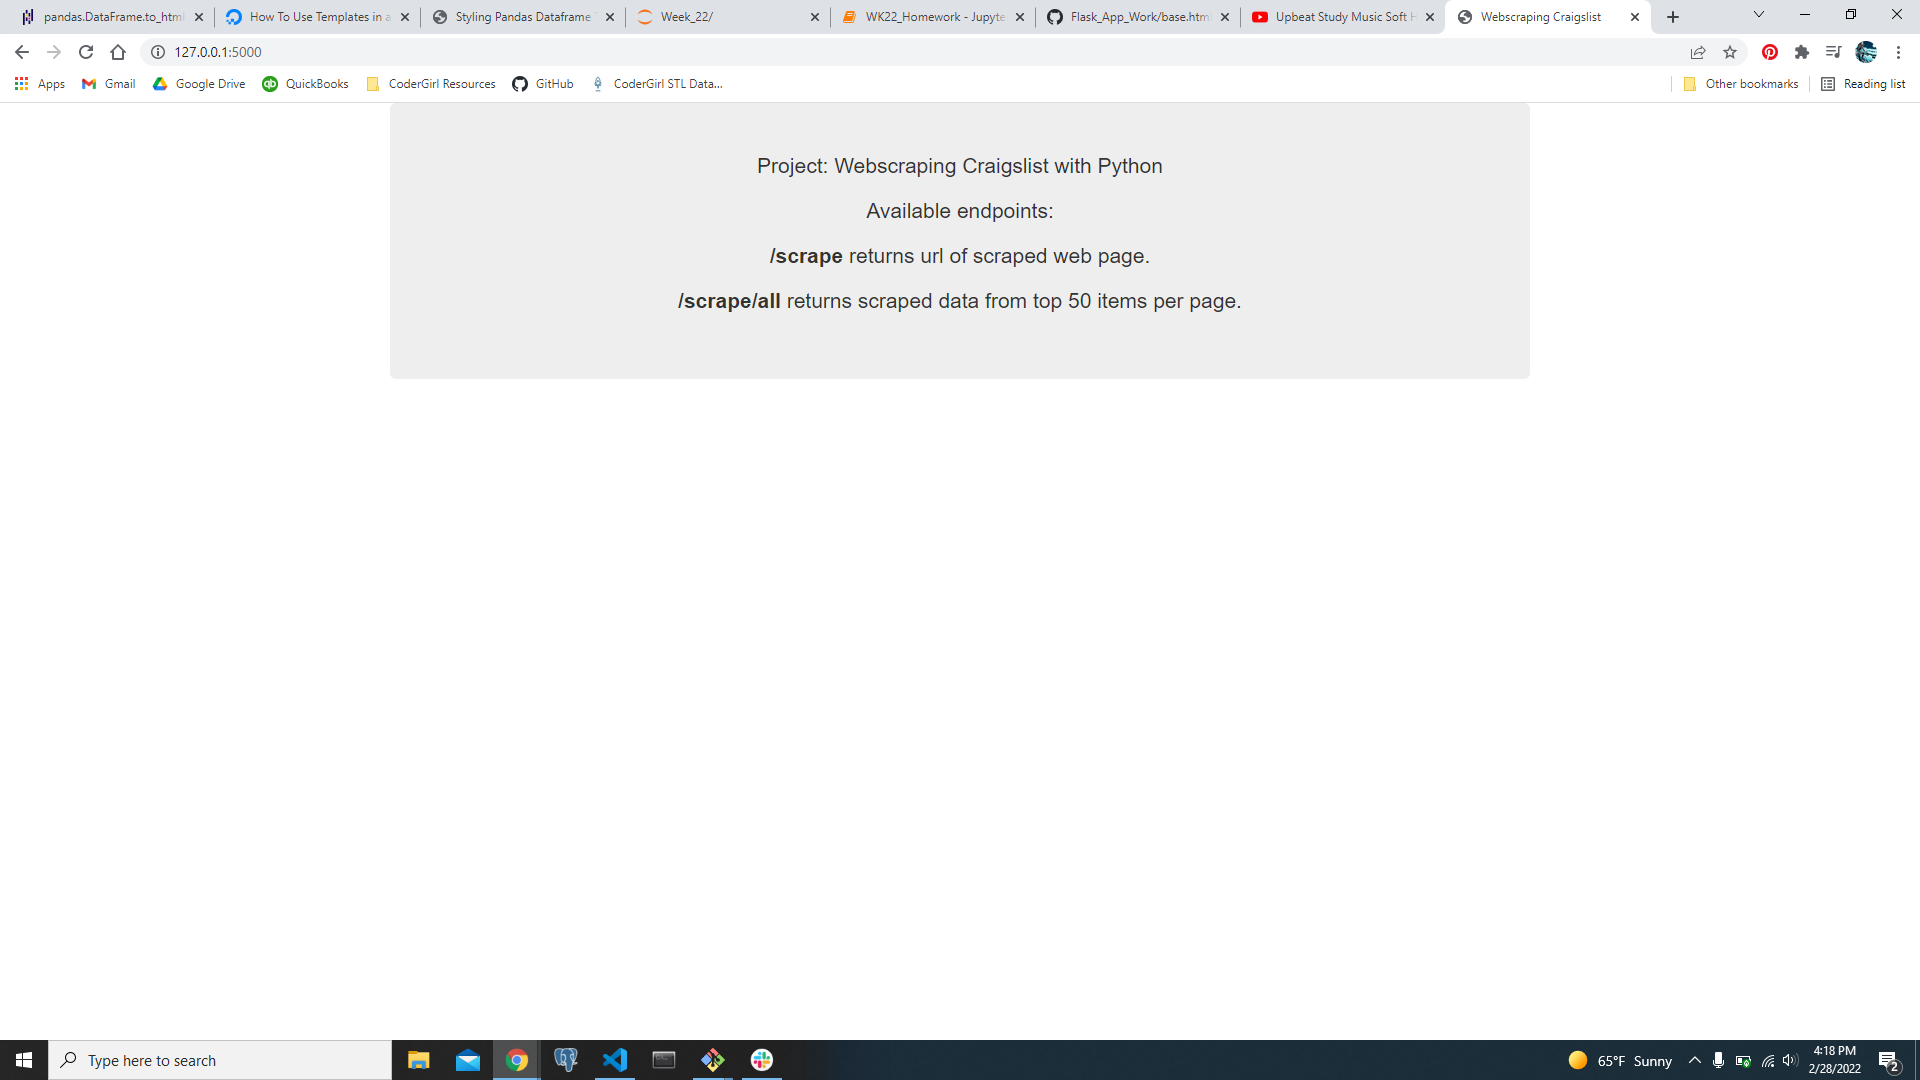

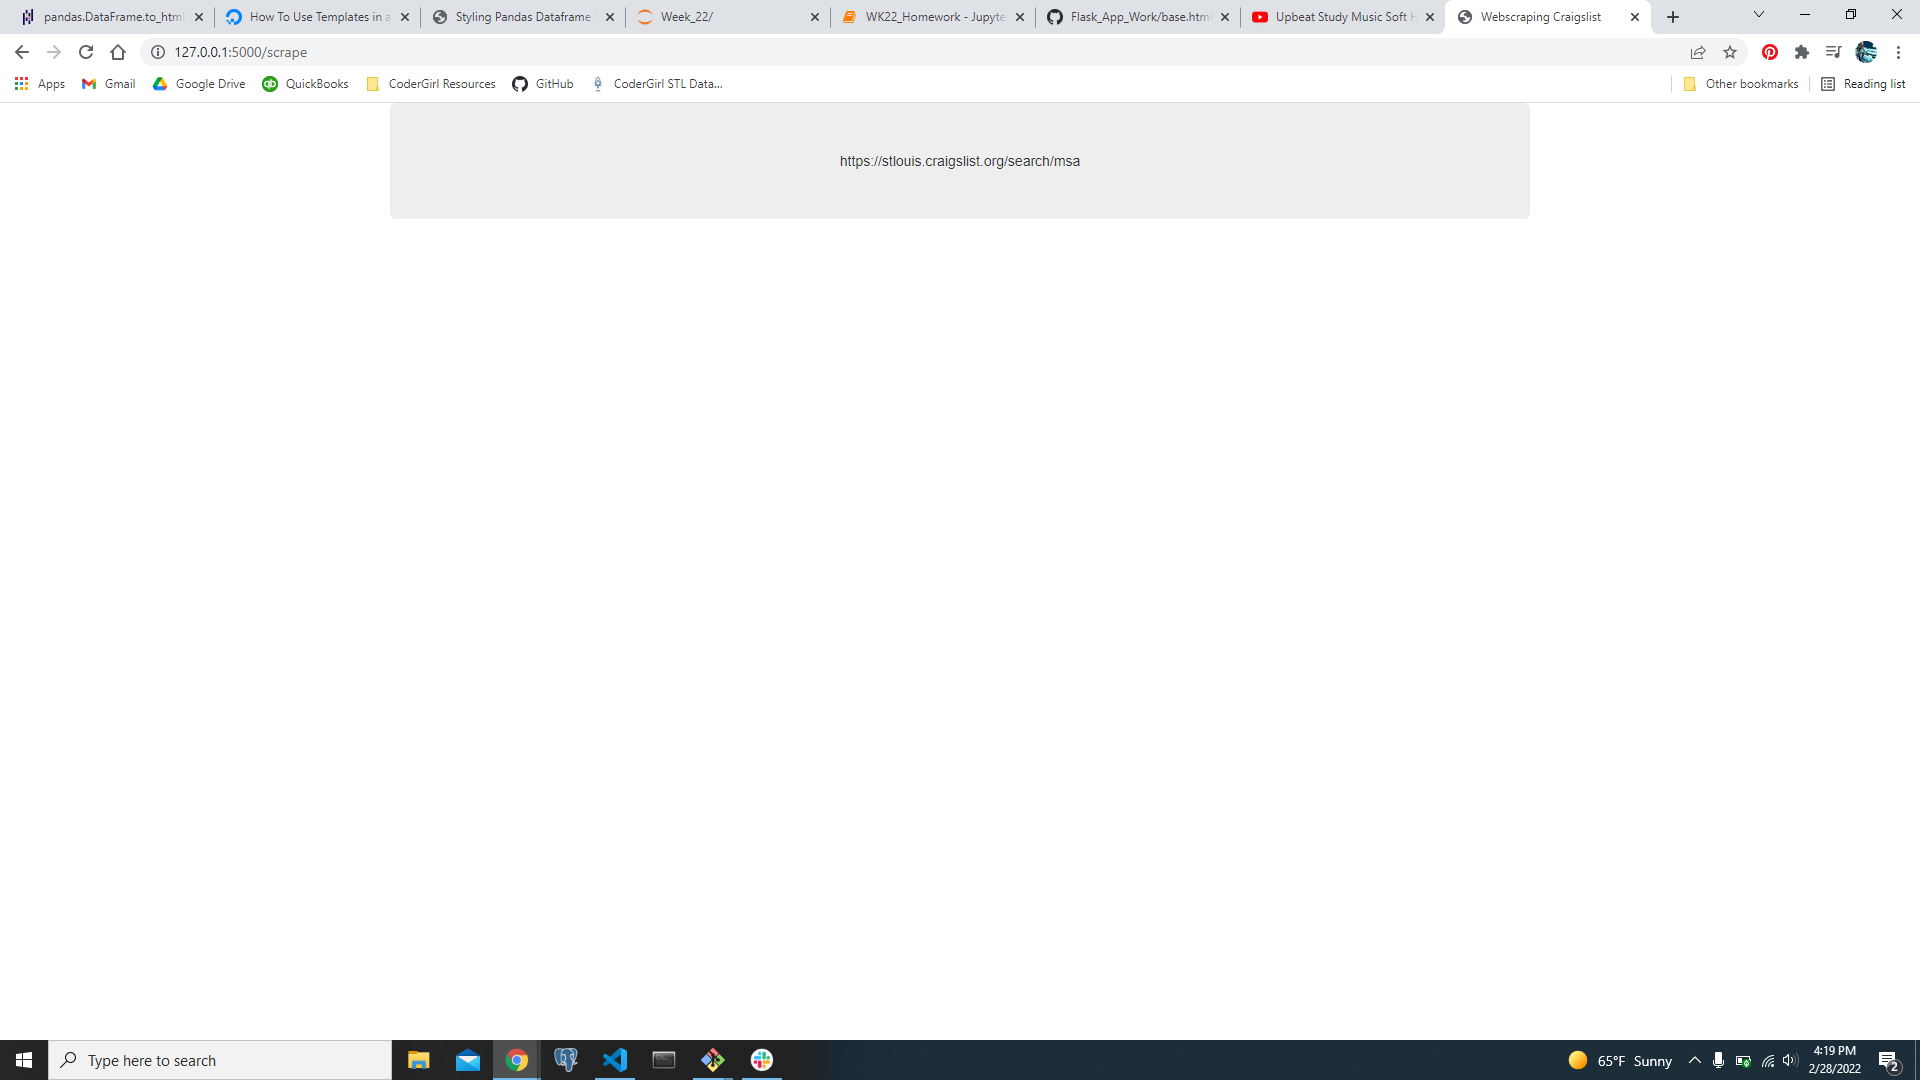

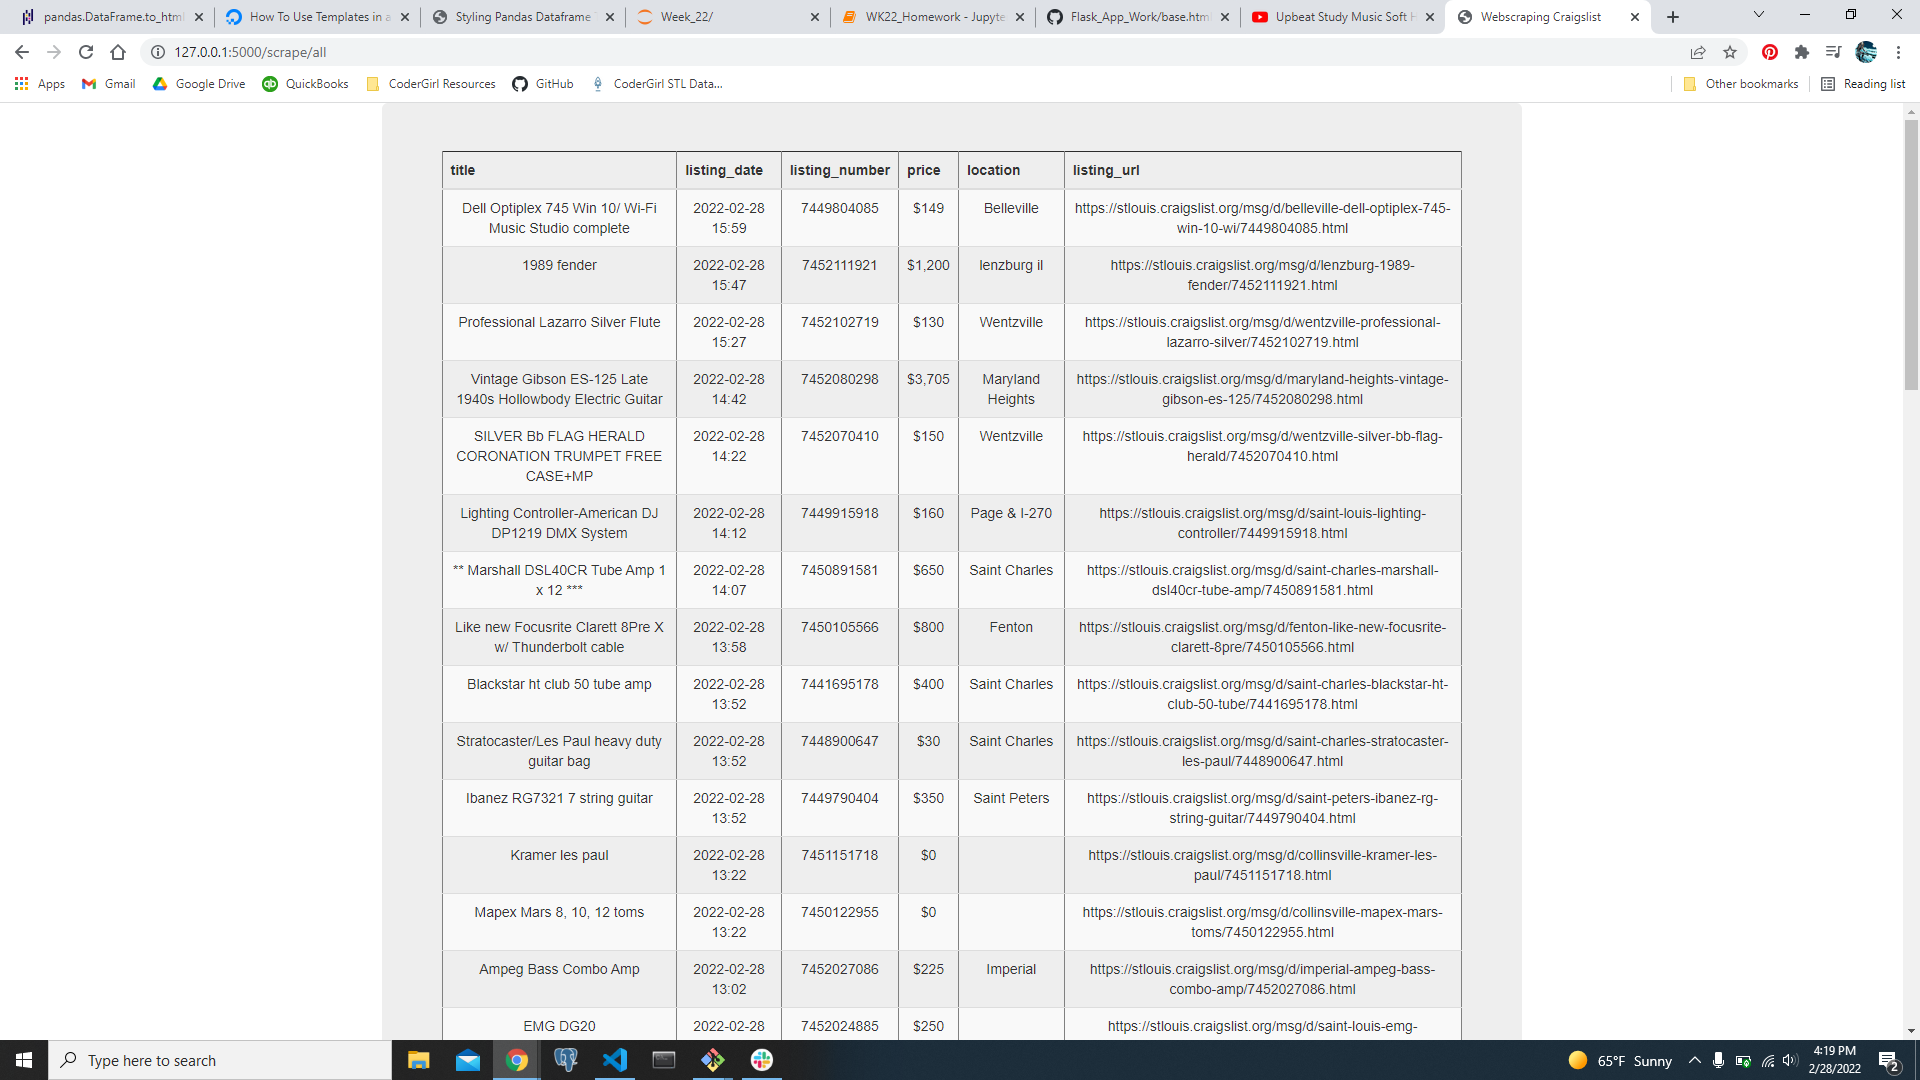

#### 3.	What is web scraping? Why is it helpful? What does it mean for your online presence? Refence the readings and DataCamp. 

Webscraping is used collect information from web pages in order to create data.  This data can then be used for business applications like comparing competitor prices, for aggregating and analyzing trends (as the author of the DataCamp course describes when discussing his project of aggregating published crime data from many police agencies into one web site), or for personal interests like collecting memes or cooking recipes.  

Webscraping is helpful because we can use modules and systems to automate the process of scraping and collecting data.

While webscraping, it is important to remember that each request from the web site's server occupies the server with the request and too many requests bombarding a single server could slow or shut it down. It is also important to check the web site's term of service to ensure that license or copyright infringement is not occuring by scraping the data.

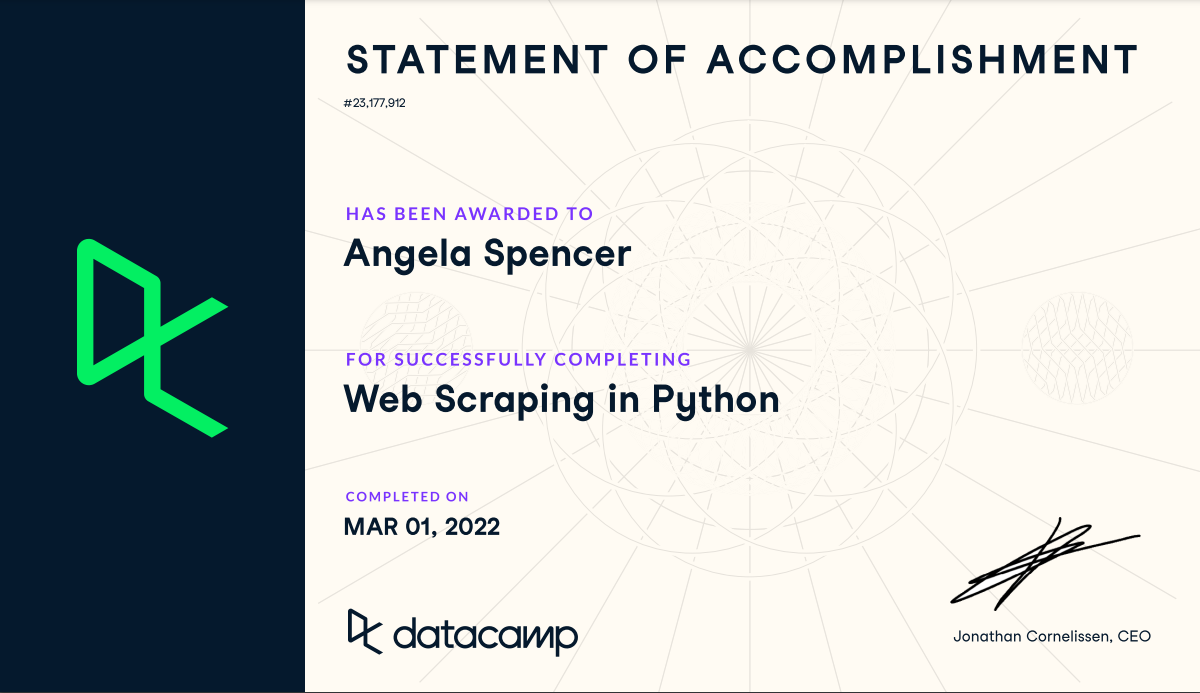